## Capstone Project

**Research title:** 

Application of Machine Learning algorithms to evaluate the changes in energy consumption in the Leinster area and subsequently the impact on consumer behaviour in the commercial sector.  


## 1. EDA Analysis

All the different stages of EDA analysis are going to be covered

## **1.1. Data Cleaning**

In [1]:
#Import the libraries

import matplotlib
matplotlib.use("TkAgg")
import pandas as pd
import seaborn as sns
import numpy as np
from keras.datasets import reuters
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from matplotlib import pyplot as plt 
%matplotlib inLine
sns.set(color_codes=True) 

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
Non_Residential = pd.read_csv('MEC03.20240304T150328.csv')

In [3]:
# Visualizing the first 5 rows
Non_Residential.head()

,Statistic Label,Year,Counties & Dublin Postal Districts,Sector,UNIT,VALUE
0,Metered Electricity Consumption,2015,Co. Carlow,20 Non-residential,Gigawatt Hours,141
1,Metered Electricity Consumption,2015,Dublin 1,20 Non-residential,Gigawatt Hours,319
2,Metered Electricity Consumption,2015,Dublin 2,20 Non-residential,Gigawatt Hours,490
3,Metered Electricity Consumption,2015,Dublin 3,20 Non-residential,Gigawatt Hours,87
4,Metered Electricity Consumption,2015,Dublin 4,20 Non-residential,Gigawatt Hours,277


In [4]:
# Checking shape of the dataset
Non_Residential.shape

(272, 6)

In [5]:
#Categorical values and the number of times those values appear in the dataset. 
#This shows us the number of categories for each cathegorical value
Non_Residential.describe(include=object)
#construction.describe(include=object)

,Statistic Label,Counties & Dublin Postal Districts,Sector,UNIT
count,272,272,272,272
unique,1,34,1,1
top,Metered Electricity Consumption,Co. Carlow,20 Non-residential,Gigawatt Hours
freq,272,8,272,272


In [6]:
# Column "Statistic Label" and "Unit" will be dropped as it only contains the word "Metered Electricity Consumption, Sector and 
# Gigawatt hours in each row and it will not produce any relevant information for my analysis.

#Dropping "Statistic Label" and "unit" features. 
Non_Residential = Non_Residential.drop(['Statistic Label', 'Sector', 'UNIT'], axis=1)
#Renaming the columns value and date.
Non_Residential = Non_Residential.rename(columns={'VALUE': 'Non Residential Value'})
#exports = exports.rename(columns={"Value": "exports", "Date": "year"})

In [7]:
# Checking the dataset after dropping those features
Non_Residential.head()

,Year,Counties & Dublin Postal Districts,Non Residential Value
0,2015,Co. Carlow,141
1,2015,Dublin 1,319
2,2015,Dublin 2,490
3,2015,Dublin 3,87
4,2015,Dublin 4,277


In [8]:
# Checking data types
Non_Residential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                272 non-null    int64 
 1   Counties & Dublin Postal Districts  272 non-null    object
 2   Non Residential Value               272 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.5+ KB


In [9]:
# Checking for null values
Non_Residential.isnull().sum()

Year                                  0
Counties & Dublin Postal Districts    0
Non Residential Value                 0
dtype: int64

In [10]:
# Loading second dataset "Residential consumers"
Residential = pd.read_csv('MEC03.20240309T180352.csv')

In [11]:
# Checking first 5 rows
Residential.head()

,Statistic Label,Year,Counties & Dublin Postal Districts,Sector,UNIT,VALUE
0,Metered Electricity Consumption,2015,Co. Carlow,10 Residential,Gigawatt Hours,106
1,Metered Electricity Consumption,2015,Dublin 1,10 Residential,Gigawatt Hours,68
2,Metered Electricity Consumption,2015,Dublin 2,10 Residential,Gigawatt Hours,34
3,Metered Electricity Consumption,2015,Dublin 3,10 Residential,Gigawatt Hours,73
4,Metered Electricity Consumption,2015,Dublin 4,10 Residential,Gigawatt Hours,83


In [12]:
# Column "Statistic Label" and "Unit" will be dropped as it only contains the word "Metered Electricity Consumption, Sector and 
# Gigawatt hours in each row and it will not produce any relevant information for my analysis.

#Dropping "Statistic Label" and "unit" features. 
Residential = Residential.drop(['Statistic Label', 'Sector', 'UNIT'], axis=1)
#Renaming the columns value and date.
Residential = Residential.rename(columns={'VALUE': 'Residential Value'})

In [13]:
Residential.head()

,Year,Counties & Dublin Postal Districts,Residential Value
0,2015,Co. Carlow,106
1,2015,Dublin 1,68
2,2015,Dublin 2,34
3,2015,Dublin 3,73
4,2015,Dublin 4,83


In [14]:
#Creating new dataframe "const" to merge the first two datasets: "exports and imports"
#through outer merge.
Meters = pd.merge(Non_Residential, Residential, how="outer")

In [15]:
Meters.head()

,Year,Counties & Dublin Postal Districts,Non Residential Value,Residential Value
0,2015,Co. Carlow,141,106
1,2015,Dublin 1,319,68
2,2015,Dublin 2,490,34
3,2015,Dublin 3,87,73
4,2015,Dublin 4,277,83


In [16]:
# Find some of the summary statistics of the database for the numerical features.
Meters.describe()

,Year,Non Residential Value,Residential Value
count,272.000000,272.000000,272.000000
mean,2018.500000,208.573529,134.628676
std,2.295511,161.246305,116.924764
min,2015.000000,12.000000,19.000000
25%,2016.750000,87.750000,69.000000
50%,2018.500000,161.500000,88.000000
75%,2020.250000,297.250000,160.750000
max,2022.000000,756.000000,611.000000


In [17]:
#Categorical values and the number of times those values appear in the dataset. 
#This shows us the number of categories for each cathegorical value
Meters.describe(include=object)
#construction.describe(include=object)

,Counties & Dublin Postal Districts
count,272
unique,34
top,Co. Carlow
freq,8


In [18]:
# Checking data types
Meters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 271
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                272 non-null    int64 
 1   Counties & Dublin Postal Districts  272 non-null    object
 2   Non Residential Value               272 non-null    int64 
 3   Residential Value                   272 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 10.6+ KB


In [19]:
# Checking for null values
Meters.isnull().sum()

Year                                  0
Counties & Dublin Postal Districts    0
Non Residential Value                 0
Residential Value                     0
dtype: int64

In [22]:
#checking the duplicates in the dataset
duplicate_rows=Meters[Meters.duplicated()]
print('number of duplicate rows: ', duplicate_rows.shape)

number of duplicate rows:  (0, 4)


## 1.2. Correlation of the variables

In [23]:
# Checking the correlation between variables
correlation = Meters.corr()
print(correlation)

                           Year  Non Residential Value  Residential Value
Year                   1.000000              -0.000379           0.024809
Non Residential Value -0.000379               1.000000           0.783305
Residential Value      0.024809               0.783305           1.000000


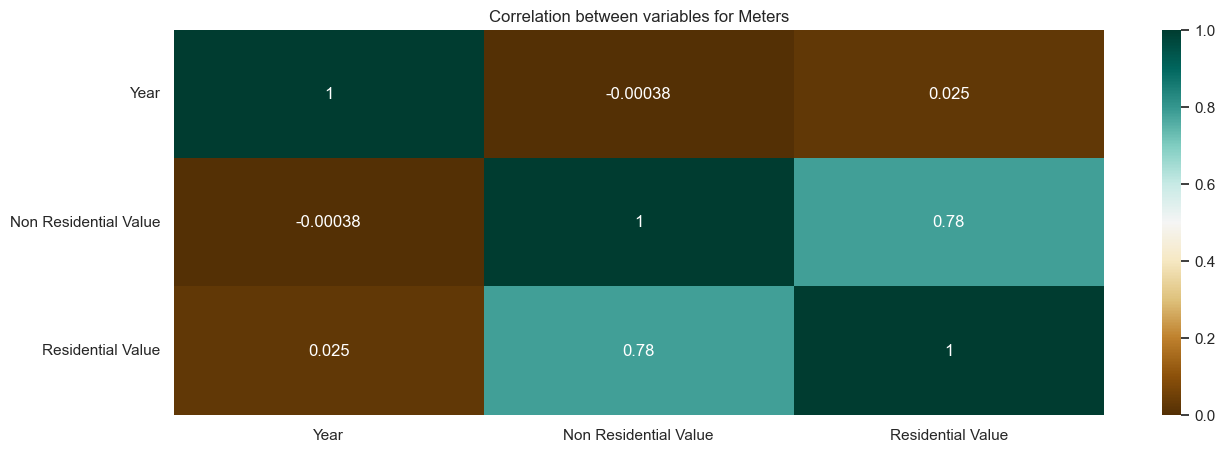

In [24]:
# Finding the relations between the variables through a heat map
plt.figure(figsize=(15,5)) 
c= Meters.corr() 
sns.heatmap(c,cmap="BrBG",annot=True) 
plt.title("Correlation between variables for Meters");
#there is a strong correlation of 0.78 between Non Residential and Residential values. There is a week correlation 
# of 0.025 between Year and and Residential Value variable. 
#There is a negative correlation of -0.000038 between Non Residential and year features.

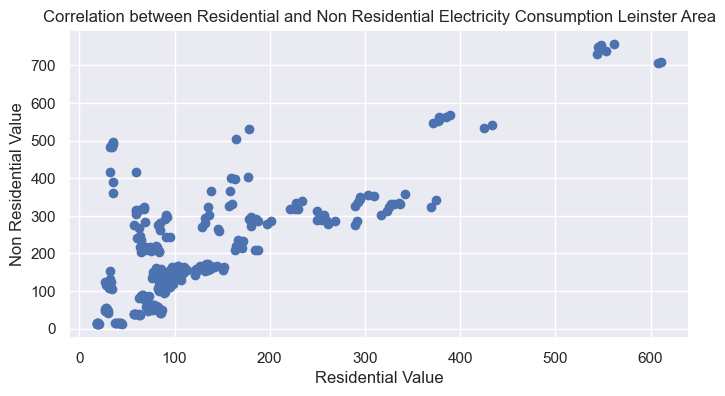

In [26]:
#Ploting a scatter plot to stablish if there is any correlation between two variables

fig, ax = plt.subplots(figsize=(8,4)) 
ax.scatter(Meters['Residential Value'], Meters['Non Residential Value']) 
ax.set_xlabel('Residential Value') 
ax.set_ylabel('Non Residential Value') 
plt.title("Correlation between Residential and Non Residential Electricity Consumption Leinster Area");
plt.show() 

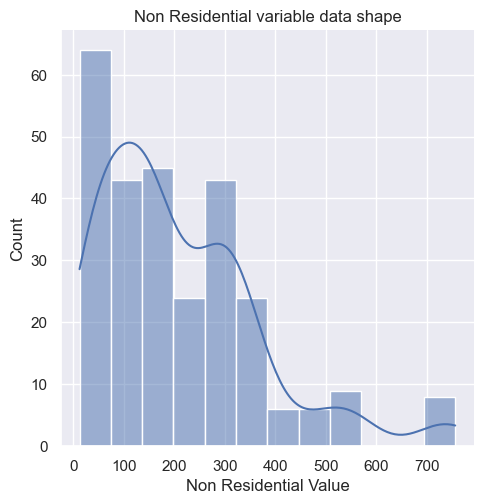

In [27]:
# Visualizing the Non Residential variable
# It can be seen that data is positive skewed in this feature.
sns.set(rc={"figure.figsize":(4, 1)})
sns.displot(data=Meters, x="Non Residential Value", kde=True);
plt.title("Non Residential variable data shape");

## 1.3. Outliers Detection.

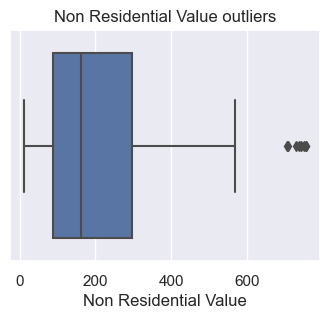

In [28]:
# Detecting Outliers
# As it can be seen below, there are ouliers in three of the numeric variables of my dataset.
sns.set(rc={"figure.figsize":(4, 3)})
sns.boxplot(x=Meters['Non Residential Value']); 
plt.title("Non Residential Value outliers");

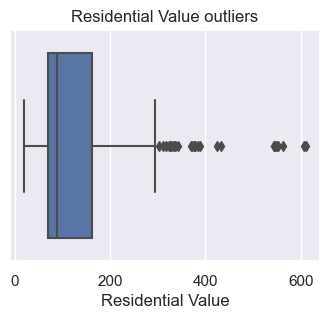

In [29]:
# Detecting Outliers on Residential variable
# As it can be seen below, there are ouliers in three of the numeric variables of my dataset.
sns.set(rc={"figure.figsize":(4, 3)})
sns.boxplot(x=Meters['Residential Value']); 
plt.title("Residential Value outliers");